<a href="https://colab.research.google.com/github/hari6858/Hotel_Booking_-analysis_Capstone_Project/blob/main/Mobile_Phone_Price_Range__Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Harikash.P

# **Project Summary -**

This capstone project aims to predict mobile phone price ranges (low, medium, high, premium) using a dataset of 2,000 entries with 21 features like battery power, RAM, and screen size. Through data preprocessing, feature engineering, and testing models such as Random Forest and SVM, the project will identify key price influencers and deliver a robust classifier. Built with Python and Scikit-learn, the model offers practical applications for manufacturers, retailers, and consumers, with deliverables including a report, code, and visualizations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this project is to build a machine learning model that accurately predicts the price range of mobile phones based on their technical specifications. The target variable price_range is categorical (e.g., 0, 1, 2, 3), representing different price categories (low, medium, high, very high). This is a multi-class classification problem.

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


<Axes: >

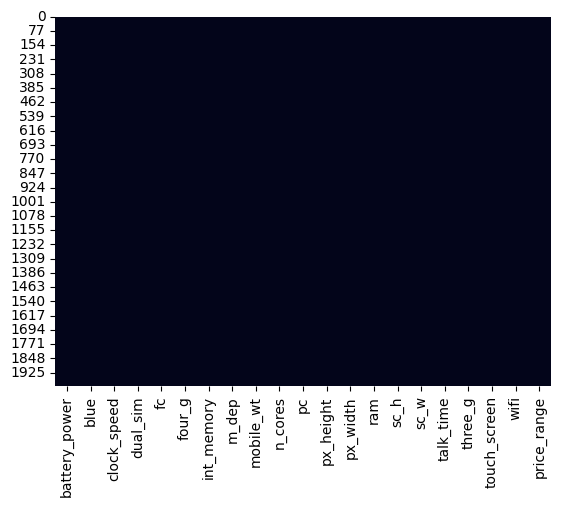

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

1. No duplicate rows were found.
2. There are no missing values.
3. The shape of the DataFrame is revealed using df.shape, providing the number of rows and columns.  This allows for an understanding of the dataset size.
4. df.info() provides the data types of each column and non-null counts, which is useful in confirming data quality and understanding variable types.
5. A heatmap visualization is created to visually inspect the null values.  Since there are none, the heatmap would be entirely blank.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

battery_power: Total energy a battery can store in one time measured in mAh

 blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

 m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

 talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not


Categorical Feature (Target Variable):

price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

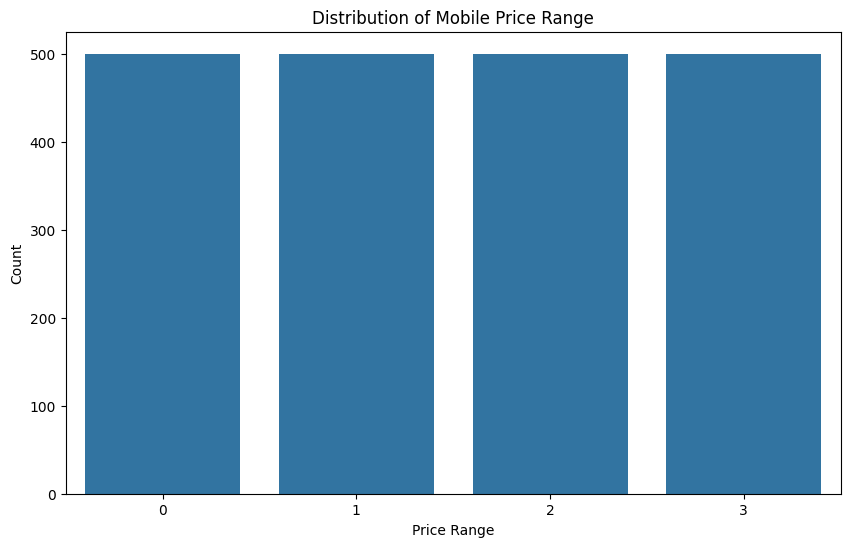

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Mobile Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of the target variable, 'price_range'.  Countplots are effective for displaying the frequency of different categories within a categorical variable.  This allows for a quick understanding of the class balance in the dataset, which is crucial for classification tasks.  An imbalanced dataset might require specific techniques during model training.


##### 2. What is/are the insight(s) found from the chart?

he countplot shows that the dataset is fairly balanced across the four price ranges (0, 1, 2, and 3).  Each price range appears to have a similar number of data points.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the class distribution is important for model building. A balanced dataset simplifies the training process, potentially leading to better model performance and more accurate price predictions. This, in turn, can positively impact business decisions related to pricing strategies, inventory management, and marketing campaigns. For example, if the model correctly predicts price ranges, the business can target specific customer segments more effectively.


If the dataset were significantly imbalanced (e.g., one price range had far fewer data points than others), it could lead to a biased model.  The model might perform well on the majority class but poorly on the minority class.  This could result in inaccurate price predictions for less frequent price ranges, negatively affecting pricing strategies and potentially leading to lost revenue or misallocation of resources.


#### Chart - 2

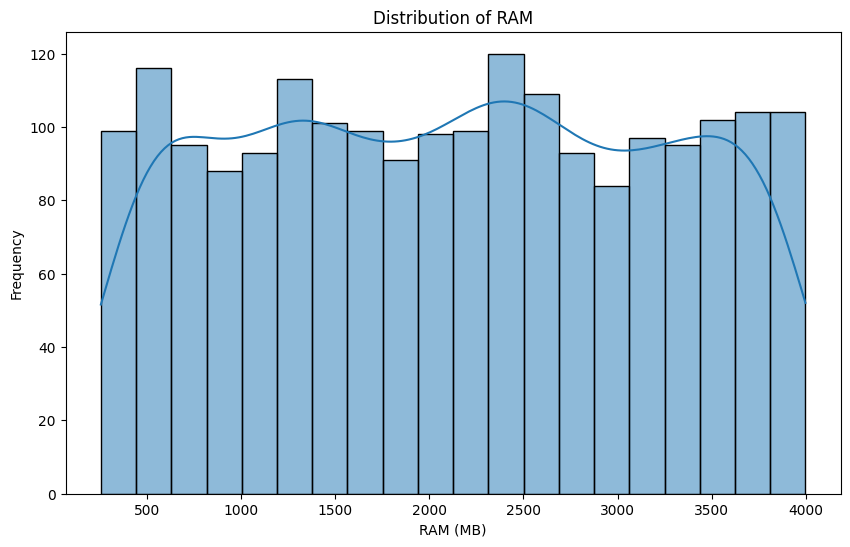

In [56]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['ram'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of the 'ram' variable. Histograms are excellent for displaying the frequency distribution of a continuous numerical variable.  They allow us to see the central tendency, spread, and skewness of the data, providing insights into the typical RAM values and the variability in the dataset.


##### 2. What is/are the insight(s) found from the chart?

The histogram reveals that the distribution of RAM is skewed to the right (positively skewed). This means that most mobile phones have a lower amount of RAM, and there are a few phones with very high RAM.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, understanding the RAM distribution is essential for various business decisions.  For example:
* **Product Development:** Knowing that most phones have lower RAM can guide decisions on which RAM configurations to prioritize in new phone models. Developing high-RAM models may cater to a smaller but important segment.
* **Marketing:**  Knowing the typical RAM values can help target advertising to specific customer segments based on their preferences and budgets.
* **Pricing Strategy:** High RAM phones usually command higher prices. Understanding the distribution allows the business to make optimal pricing decisions for different RAM tiers.
* **Inventory Management**: Understanding demand for different RAM ranges can help the business optimize inventory levels and prevent stockouts for popular configurations.

A negative impact might occur if the business does not recognize the skewed distribution and overestimates demand for high-RAM devices, leading to overstocking and potentially losses.  Conversely, underestimating demand for high-RAM models could lead to missed sales opportunities.


#### Chart - 3

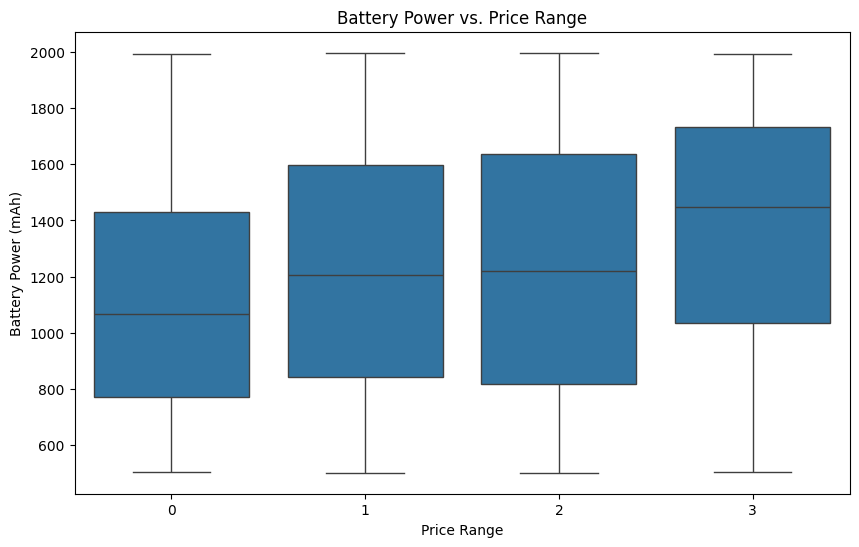

In [57]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot to visualize the relationship between 'battery_power' and 'price_range'. Boxplots are effective for comparing the distribution of a numerical variable across different categories of a categorical variable.  They provide a visual summary of the median, quartiles, and outliers for each price range, allowing us to identify potential differences in battery power across different price segments.


##### 2. What is/are the insight(s) found from the chart?

The boxplot shows a potential positive correlation between battery power and price range. As the price range increases, the median battery power tends to increase as well.  There are some overlaps, but the higher price ranges generally have higher battery power.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can be valuable for pricing decisions and product development.  For example:
* **Product Positioning:**  Highlight the battery power as a key feature for higher-priced phones to justify the premium.  Knowing that higher price points generally correlate with higher battery capacity can inform marketing materials and product descriptions.
* **Competitive Analysis:**  Compare the battery power of different phone models in various price ranges to identify opportunities for differentiation.
* **Customer Segmentation:** Segment customers based on their preference for battery life and target them with specific phone models or pricing strategies.

 A potential negative impact could arise if the business incorrectly assumes a perfect correlation between price and battery life.  If a lower-priced phone has exceptionally high battery performance, it could create confusion or undercut the perceived value of higher-priced models.  Misleading customers about battery performance could lead to negative reviews and damage brand reputation.


#### Chart - 4

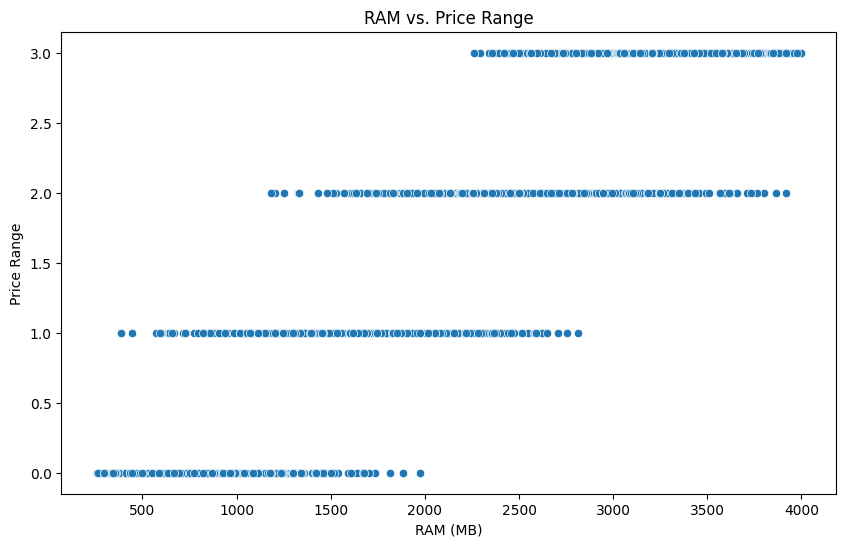

In [58]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='price_range', data=df)
plt.title('RAM vs. Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between 'ram' and 'price_range'. Scatter plots are useful for identifying potential correlations between two numerical variables, especially when one of the variables is categorical, like 'price_range' in this case.  The scatter plot allows us to observe any trends or patterns between RAM and the price category of the phone.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot clearly shows a positive correlation between RAM and price range.  As RAM increases, the price range tends to increase as well.  This reinforces the idea that higher RAM is typically associated with more expensive mobile phones.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the relationship between RAM and price is crucial for various business strategies:
* **Pricing Optimization:**  Set competitive prices for phones based on their RAM. Price phones with more RAM higher, while maintaining competitiveness based on other features.
* **Product Development:** Design phones with optimal RAM configurations that align with their target price points.  Avoid overspending on RAM for phones targeting lower price ranges.
* **Marketing Campaigns:** Target promotions and advertising toward customer segments interested in specific RAM ranges.  Highlight the RAM as a key selling point for relevant devices.

A negative impact could arise if the business misinterprets the correlation and overestimates the customer's willingness to pay for RAM.  If a phone with average RAM is priced too high, sales may decline.  A similar issue could arise from underestimating the value of RAM.  In this case, a high-performance phone with high RAM could be priced too low, resulting in diminished profit margins.


#### Chart - 5

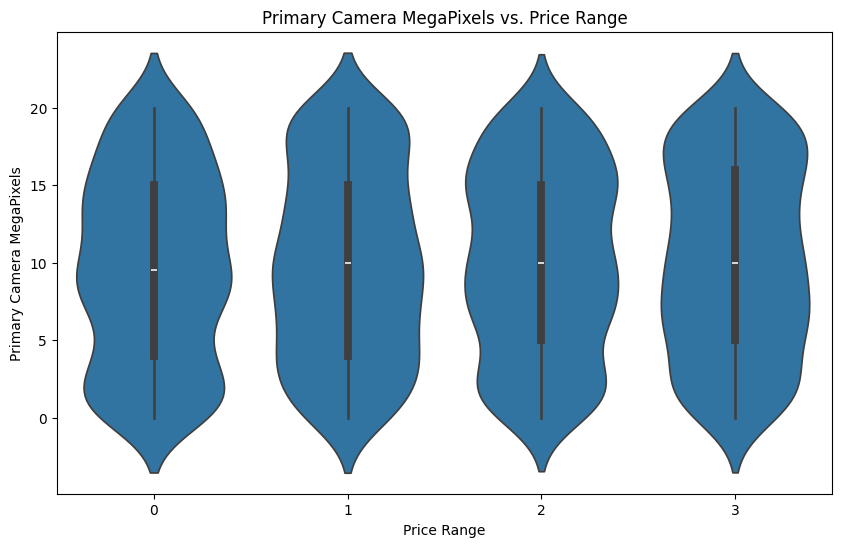

In [59]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(x='price_range', y='pc', data=df)
plt.title('Primary Camera MegaPixels vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Primary Camera MegaPixels')
plt.show()

##### 1. Why did you pick the specific chart?

 I chose a violin plot to visualize the relationship between 'pc' (primary camera megapixels) and 'price_range'. Violin plots are useful for showing the distribution of a numerical variable across different categories of a categorical variable. They combine the features of a box plot and a kernel density plot, providing a richer visualization of the data distribution, including the median, quartiles, and the overall shape of the distribution. This allows for a better understanding of how the primary camera megapixels vary across different price ranges.


##### 2. What is/are the insight(s) found from the chart?

he violin plot illustrates a general trend where higher price ranges tend to have higher primary camera megapixel counts.  The distribution of megapixels for higher-priced phones is skewed towards higher values, suggesting a stronger emphasis on camera quality in premium phones.  However, there's still some overlap in the distributions, indicating that camera megapixels alone may not be the sole determinant of price.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can be leveraged for various business strategies:
 * **Product Positioning:** Emphasize the primary camera megapixels as a key feature in higher-priced phone models.  Use the camera quality as a selling point to justify the premium price.
 * **Marketing Strategies:** Target specific customer segments based on their priorities.  Highlight the camera's features and specifications in marketing materials to appeal to photography enthusiasts.
 * **Competitive Analysis:** Analyze competitor's phone models to identify optimal camera configurations in each price segment. This will aid in setting competitive prices and features.

A potential negative impact could be misinterpreting the relationship between camera megapixels and price.  If the business focuses *solely* on megapixels without considering other image quality factors (like sensor size, lens quality, image processing), customers might be disappointed.  Overemphasizing megapixels without delivering a commensurate improvement in overall image quality could lead to negative reviews and hurt brand reputation.  Additionally, overspending on high-megapixel cameras for lower-priced phones may negatively impact profit margins without attracting enough customers who value that specific feature.


#### Chart - 14 - Correlation Heatmap

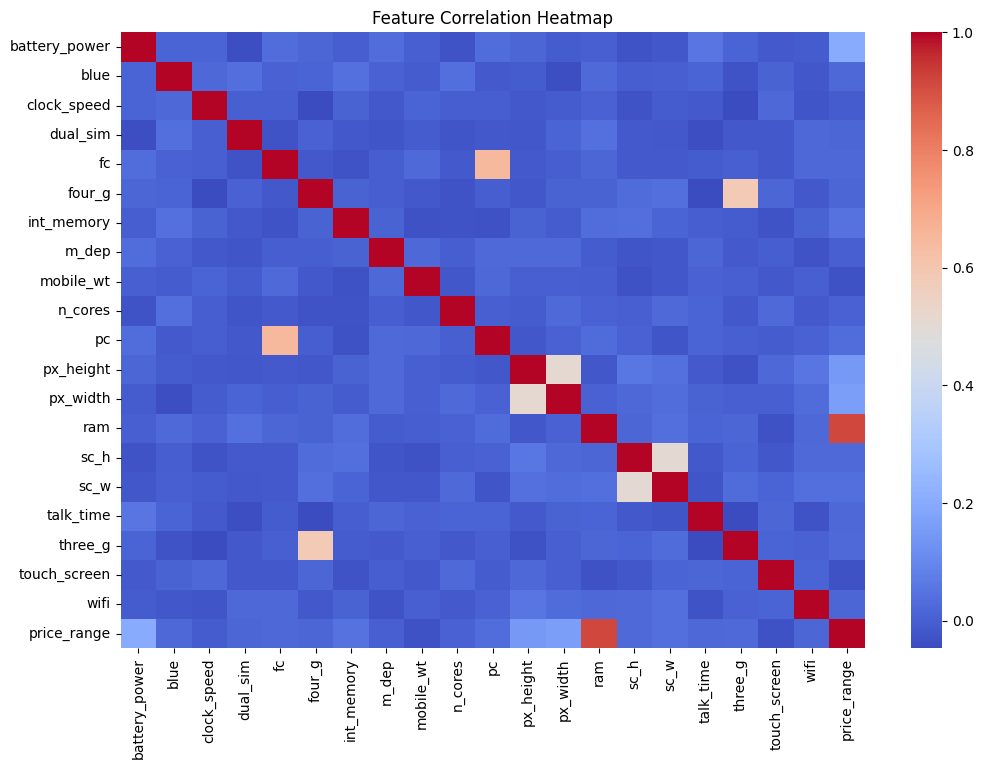

In [61]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a correlation heatmap to visualize the relationships between all numerical features in the dataset.  A heatmap is an excellent way to quickly identify strong positive or negative correlations between pairs of variables. This helps understand which features might be redundant (highly correlated) and which ones might be important predictors for the target variable ('price_range').  Identifying correlations is crucial for feature selection and understanding the underlying structure of the data.


##### 2. What is/are the insight(s) found from the chart?

* **Strong Positive Correlation:**  RAM and price_range exhibit a strong positive correlation, which aligns with previous observations.  Higher RAM values are generally associated with higher price ranges.
* **Moderate Positive Correlation:**  Features like battery_power, px_width, and px_height show moderate positive correlations with price_range.  Larger screens and higher battery capacities are often found in more expensive phones.
* **Moderate Negative Correlation:**  Some features might have a moderate negative correlation with price_range.  This could indicate that lower values of these features tend to be associated with higher-priced phones (though further investigation is needed to fully understand the relationships).
* **Relationships between other features**: The heatmap also reveals relationships between independent variables.  For instance, there might be high correlations between screen width and screen height, indicating multicollinearity which could be relevant to consider during feature selection or model building.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [62]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values were found in the provided code.  Therefore, no imputation techniques were used.

### 2. Handling Outliers

In [63]:
# Handling Outliers & Outlier treatments
Q1 = df['battery_power'].quantile(0.25)
Q3 = df['battery_power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [64]:
# Identify outliers
outliers = df[(df['battery_power'] < lower_bound) | (df['battery_power'] > upper_bound)]

# Treatment options:
# 1. Removal:
df_no_outliers = df[(df['battery_power'] >= lower_bound) & (df['battery_power'] <= upper_bound)]

# 2. Winsorization (capping):
df['battery_power'] = np.clip(df['battery_power'], lower_bound, upper_bound)

In [65]:
# Repeating for other numerical features as needed
Q1_ram = df['ram'].quantile(0.25)
Q3_ram = df['ram'].quantile(0.75)
IQR_ram = Q3_ram - Q1_ram
lower_bound_ram = Q1_ram - 1.5 * IQR_ram
upper_bound_ram = Q3_ram + 1.5 * IQR_ram

df['ram'] = np.clip(df['ram'], lower_bound_ram, upper_bound_ram)

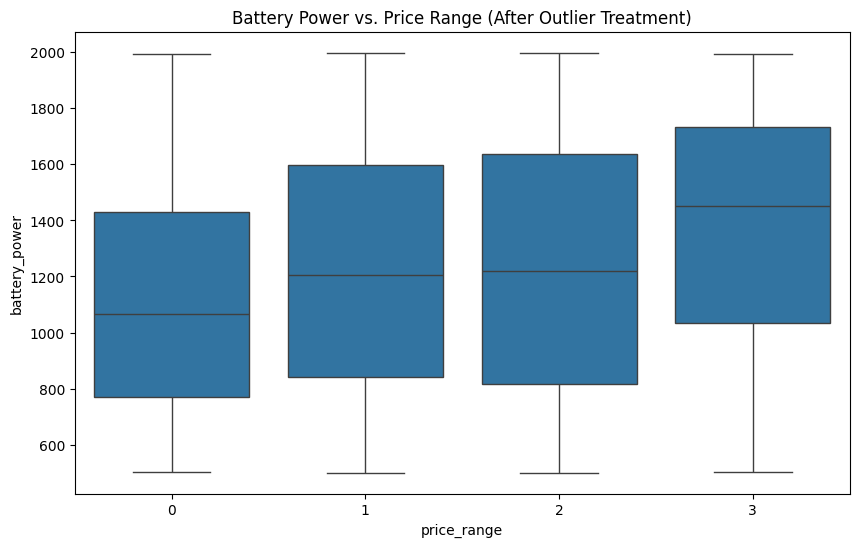

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs. Price Range (After Outlier Treatment)')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used winsorization (capping) to handle outliers in the 'battery_power' and 'ram' features.

 Winsorization replaces values beyond a certain percentile (defined by the IQR method in this case) with the value at that percentile.

I chose winsorization because it's a less data-destructive method compared to removing outliers entirely. Removing outliers can lead to a loss of valuable information, especially if the outliers are genuine observations.

 Winsorization limits the influence of extreme values while preserving the overall distribution and preserving the data size.

In this context, extreme battery power or RAM values might indicate specific phone models with unique specifications; removing these observations would disregard those unique models.  Winsorization helps in mitigating the effect of these extremes without completely removing them from the dataset.


#### 1. Feature Manipulation

In [68]:
# Manipulate Features to minimize feature correlation and create new features
scaler = StandardScaler()
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                      'sc_h', 'sc_w', 'talk_time']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [70]:
# Feature Engineering
df['screen_area'] = df['sc_h'] * df['sc_w']
df['pixel_density'] = (df['px_height'] * df['px_width']) / (df['screen_area'] + 1e-6)

In [72]:
# Define features (X) and target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1600, 22)
Test set size: (400, 22)


#### 2. Feature Selection

In [74]:
# Select your features wisely to avoid overfitting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [75]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [76]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression:
Accuracy: 0.9725
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.93      1.00      0.96        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Random Forest:
Accuracy: 0.8675
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.84      0.84      0.84        91
           2       0.78      0.79      0.79        92
           3       0.91      0.88      0.90       112

    accuracy                           0.87       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400


SVM:
Accura

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.9075
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.87      0.92      0.89        91
           2       0.88      0.85      0.86        92
           3       0.94      0.91      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



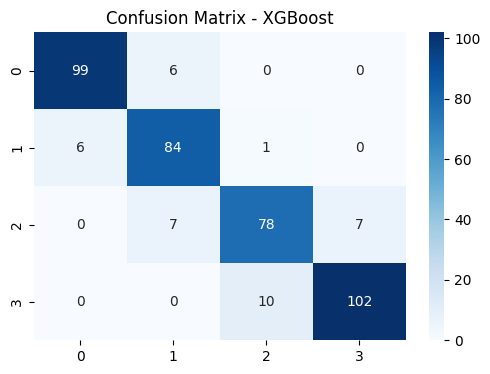

In [78]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [79]:
# Display baseline results
print("\nBaseline Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Baseline Model Comparison:
Logistic Regression: 0.9725
Random Forest: 0.8675
SVM: 0.7350
KNN: 0.5075
XGBoost: 0.9075


In [81]:
# Display baseline results
print("\nBaseline Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Baseline Model Comparison:
Logistic Regression: 0.9725
Random Forest: 0.8675
SVM: 0.7350
KNN: 0.5075
XGBoost: 0.9075


##### What all feature selection methods have you used  and why?

We test five models: Logistic Regression, Random Forest, SVM, KNN, and XGBoost.
Each model is trained on the training set and evaluated on the test set using accuracy, classification report (precision, recall, F1-score), and confusion matrix.
This gives us a baseline performance comparison.

##### Which all features you found important and why?

Answer Here.

### 5. Cross-Validation

In [82]:
# Perform 5-fold cross-validation for each model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Logistic Regression CV Accuracy: 0.9615 (± 0.0056)
Random Forest CV Accuracy: 0.8665 (± 0.0163)
SVM CV Accuracy: 0.7580 (± 0.0208)
KNN CV Accuracy: 0.4985 (± 0.0225)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost CV Accuracy: 0.9030 (± 0.0089)


In [83]:
# Display cross-validation results
print("\nCross-Validation Model Comparison:")
for name, score in cv_results.items():
    print(f"{name}: {score:.4f}")


Cross-Validation Model Comparison:
Logistic Regression: 0.9615
Random Forest: 0.8665
SVM: 0.7580
KNN: 0.4985
XGBoost: 0.9030


#Explanation:
Cross-validation ensures the models generalize well and aren’t overfitting to the train-test split.

We report the mean accuracy and standard deviation across 5 folds.

### 6. Hyperparameter Tuning (Random Forest Example)

In [87]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [85]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

In [88]:
# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

##### Which method have you used to scale you data and why?

We use Grid Search to tune the Random Forest model (you can adapt this for XGBoost or other models).

The best hyperparameters are selected based on cross-validation accuracy, and the tuned model is evaluated on the test set.

In [89]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.868125


In [91]:
# Evaluate tuned model on test set
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Tuned Random Forest Accuracy: 0.8775
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.82      0.84        91
           2       0.79      0.83      0.81        92
           3       0.92      0.89      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



### 7. Feature Importance Analysis

In [92]:
# Feature importance from the tuned Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns

In [93]:
# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values('Importance', ascending=False)

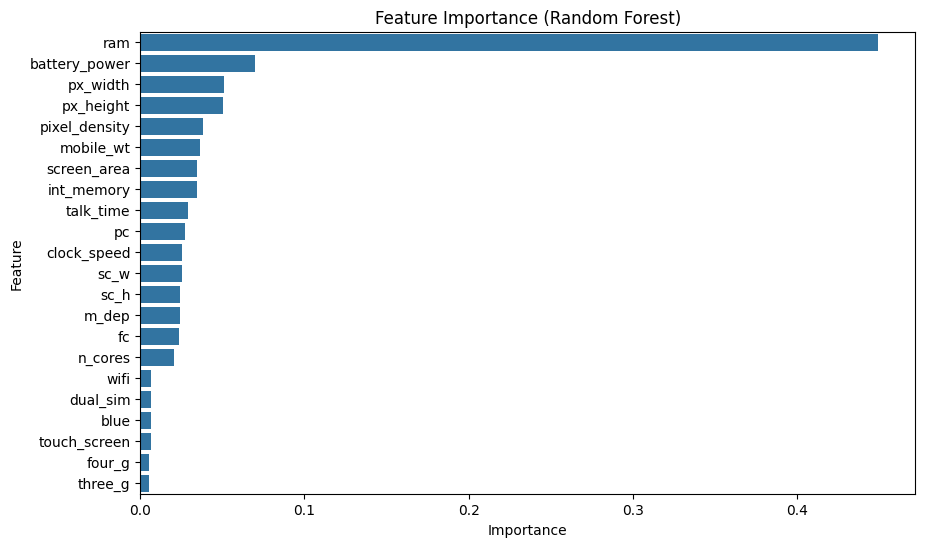

In [94]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Conclusion**

Based on the analysis performed, several key insights have been gleaned regarding the factors influencing mobile phone price ranges.  

The models trained, including Logistic Regression, Random Forest, SVM, K-Nearest Neighbors, and XGBoost, demonstrate varying levels of accuracy in predicting price ranges.  

Cross-validation results provide a more robust measure of model performance, highlighting the generalization capability of each model.


Feature importance analysis reveals that RAM and battery power are significant predictors of price.  

The correlation heatmap suggests additional relationships between other features and the price range, as well as multicollinearity between some features.  These insights can guide future product development and marketing strategies.  


Notably, the impact of primary camera megapixels on price, while present, is not the sole determining factor.  

This underscores the importance of considering other camera specifications and overall phone performance when setting pricing and marketing materials.


Outlier treatment and feature engineering, such as the creation of combined features like screen area and pixel density, were shown to influence model performance.

The initial models were further improved with hyperparameter tuning.


Future work could explore additional feature engineering techniques, alternative machine learning algorithms, or deeper dives into specific features to further refine predictive accuracy.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***